In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load dataset
df = pd.read_csv('../data/raw/housing.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (20640, 10)
Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [3]:
# Basic information about the dataset
print("Dataset info:")
df.info()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Display first 5 rows
print ("First 5 rows:")
df.head()

First 5 rows:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Statistical summary of the dataset
print("Statistical summary:")
df.describe()

Statistical summary:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# Check for missing values
print("Missing values:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print(f"Total missing values: {missing_values.sum()}")

Missing values:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Total missing values: 207


In [11]:
# Target variable analysis
print("Price analysis:")
print(f"Mean price: ${df['median_house_value'].mean():,.0f}")
print(f"Median price: ${df['median_house_value'].median():,.0f}")
print(f"Min price: ${df['median_house_value'].min():,.0f}")
print(f"Max price: ${df['median_house_value'].max():,.0f}")
print(f"Standard deviation: ${df['median_house_value'].std():,.0f}")

Price analysis:
Mean price: $206,856
Median price: $179,700
Min price: $14,999
Max price: $500,001
Standard deviation: $115,396


In [12]:
# Correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

print("Correlation with Price:")
price_corr = correlation_matrix['median_house_value'].sort_values(ascending=False)
print(price_corr)

Correlation with Price:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


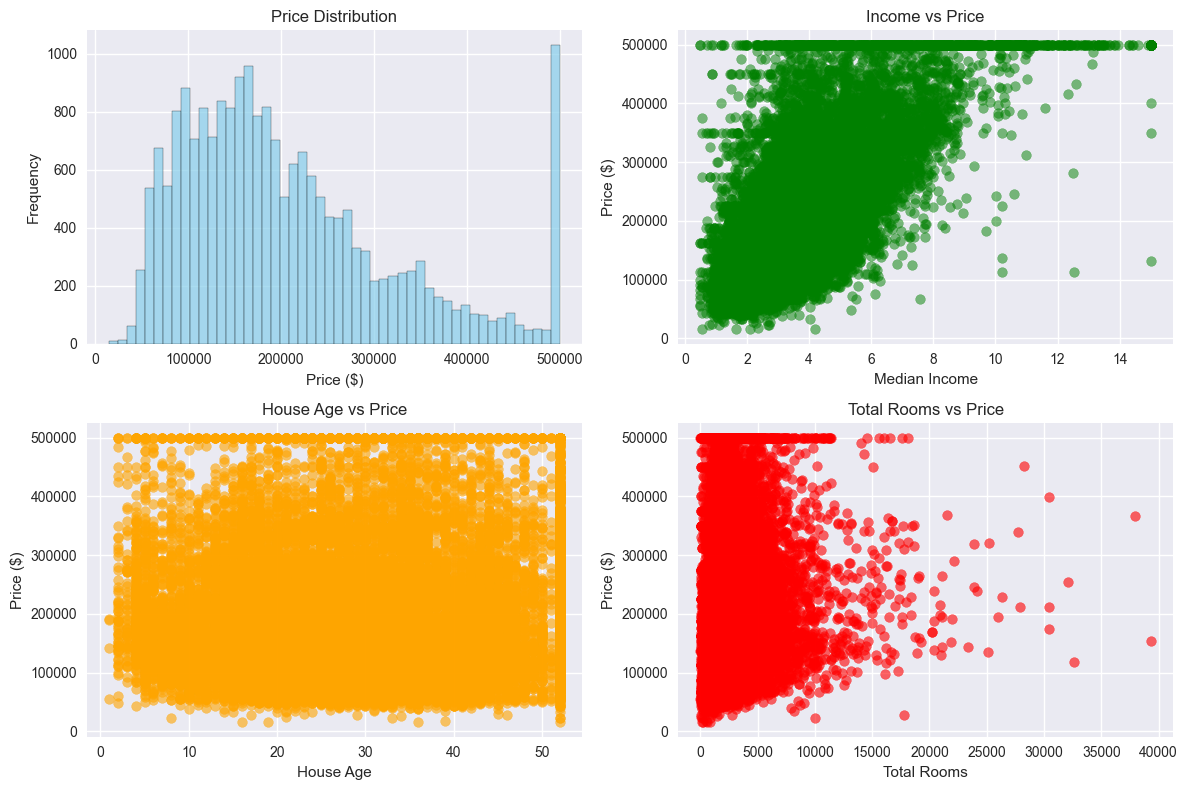

In [13]:
# Price distribution
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(df['median_house_value'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.5, color='green')
plt.title('Income vs Price')
plt.xlabel('Median Income')
plt.ylabel('Price ($)')

plt.subplot(2, 2, 3)
plt.scatter(df['housing_median_age'], df['median_house_value'], alpha=0.6, color='orange')
plt.title('House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('Price ($)')

plt.subplot(2, 2, 4)
plt.scatter(df['total_rooms'], df['median_house_value'], alpha=0.6, color='red')
plt.title('Total Rooms vs Price')
plt.xlabel('Total Rooms')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

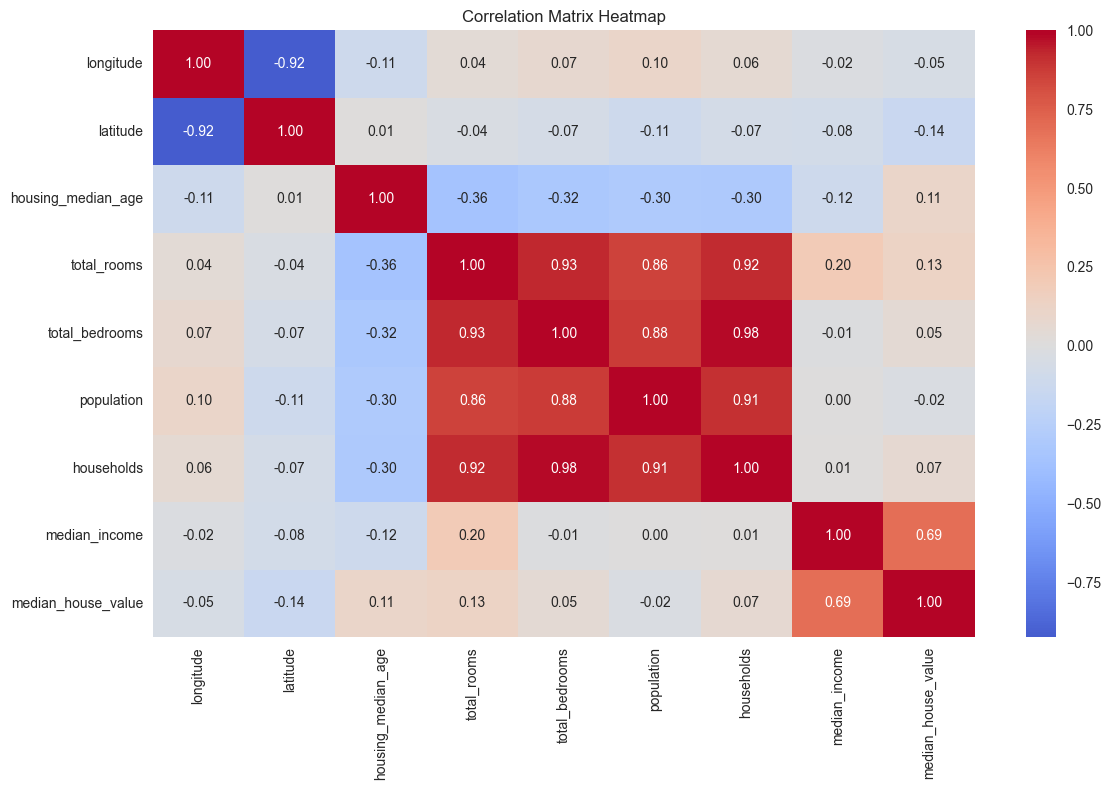

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [15]:
# Ocean proximity analysis
print("Ocean Proximity Analysis:")
print('='*50)

# County by ocean proximity
ocean_counts = df['ocean_proximity'].value_counts()
print("Count by Ocean Proximity:")
print(ocean_counts)

print("\nAverage price by Ocean Proximity:")
ocean_price = df.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)
print(ocean_price)

Ocean Proximity Analysis:
Count by Ocean Proximity:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Average price by Ocean Proximity:
ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64


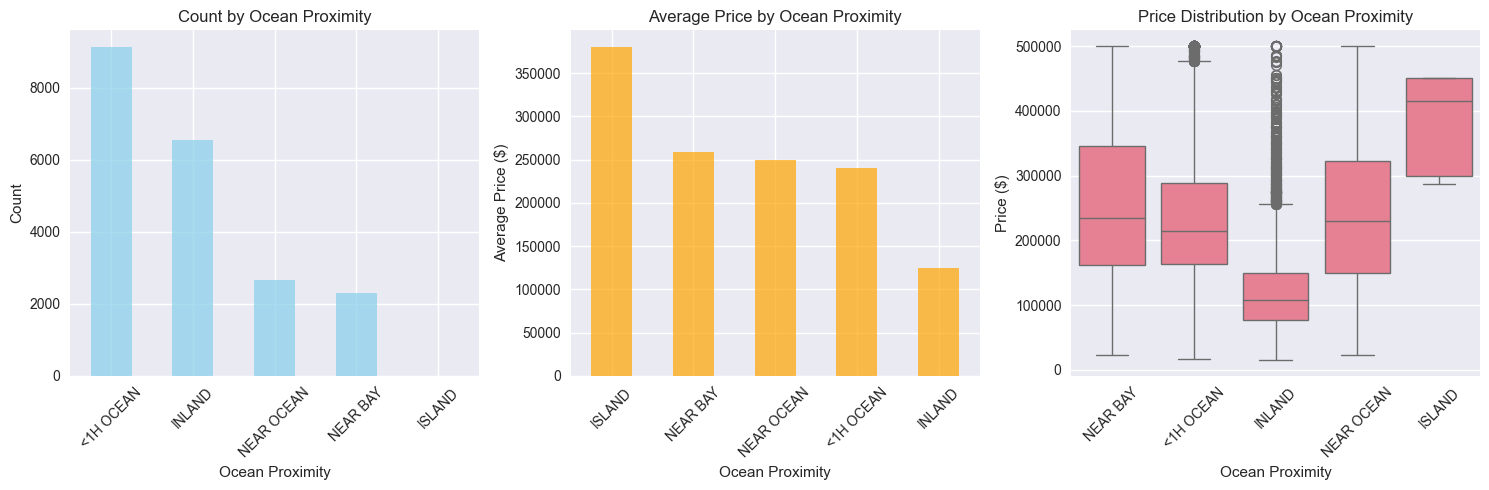

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
ocean_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Count by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
ocean_price.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Average Price by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('Price Distribution by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Summary
print("DATA EXPLORATION SUMMARY")
print('=' * 50)

print(f"Dataset shape: {df.shape}")
print(f"Price Range: ${df['median_house_value'].min():,.0f} - ${df['median_house_value'].max():.0f}")
print(f"Average Price: ${df['median_house_value'].mean():,.0f}")

print("\nKey Correlations with Price:")
price_corr = correlation_matrix['median_house_value'].sort_values(ascending=False)
for feature, corr in price_corr.head(4).items():
    if feature != 'median_house_value':
        print(f" {feature}: {corr:.3f}")

print("\nPrice by Ocean Proximity:")
ocean_price = df.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)
for location, price in ocean_price.items():
    print(f" {location}: ${price:,.0f}")

print("\nData Quality Issues:")
print(f" Missing values in total_bedrooms: {df['total_bedrooms'].isnull().sum()}")
print(f" Price cap at $500,001: {len(df[df['median_house_value'] == 500001])} records")

print("\nReady for model development!")

DATA EXPLORATION SUMMARY
Dataset shape: (20640, 10)
Price Range: $14,999 - $500001
Average Price: $206,856

Key Correlations with Price:
 median_income: 0.688
 total_rooms: 0.134
 housing_median_age: 0.106

Price by Ocean Proximity:
 ISLAND: $380,440
 NEAR BAY: $259,212
 NEAR OCEAN: $249,434
 <1H OCEAN: $240,084
 INLAND: $124,805

Data Quality Issues:
 Missing values in total_bedrooms: 207
 Price cap at $500,001: 965 records

Ready for model development!
